# Fitting noisy astronomical data

In the [previous notebook](1. Fitting astronomical images and spectra.ipynb), we had a good time fitting (synthetic) data cubes using a simple model of the continuum and spectral line emission and spatial convolution kernel. We will continue to use the same model, but now we will attempt to fit the data cube in the presence of *heteroscedastic* noise. 

Heteroscedasticity just means that the noise (and therefore uncertainty) is not distributed uniformly and may be correlated. I have generated a synthetic noise profile that varies with channel but is not correlated on spatial scales -- so don't worry about that!

Let's begin by loading the noisy data set and plotting it.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

# operating system-independent file paths...
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
frequencies_fname = os.path.join(root_dir, 'data', 'frequencies.npy')
noisy_cube_fname = os.path.join(root_dir, 'data', 'noisy_cube.npy')

# loading the data
frequencies = np.load(frequencies_fname)
noisy_cube = np.load(noisy_cube_fname)

# inspect size of data
print(frequencies.shape)
print(noisy_cube.shape)

N_k, N_i, N_j = noisy_cube.shape

(256,)
(256, 32, 32)


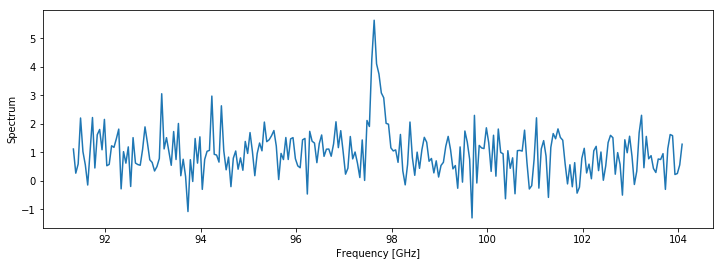

In [20]:
# plot a spectrum through middle pixel
i, j = 16, 16

plt.figure(figsize=(12, 4))
plt.plot(frequencies, noisy_cube[:, i, j])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Spectrum');

Looks reasonable. We can still see a spectral line around 98 GHz, and that there is a positive continuum with amplitude of $\sim 1$.

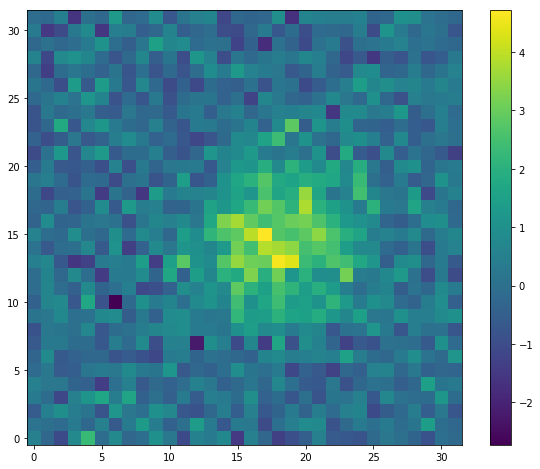

In [21]:
# plot a random channel/slice of the cube
k = 130

plt.figure(figsize=(10, 8))
plt.imshow(noisy_cube[k], origin='lower')
plt.colorbar();

## The chi-squared objective function
So we can see right off the bat that fitting these data will be harder. Thankfully, we can leverage a better objective function if we have an estimate of uncertainties, the $\chi^2$ (chi-squared) function:

$$\chi^2 = \sum_{k=1}^{N_k} \frac{\big (y_k - \hat y(x_k; \vec \theta) \big)^2}{2 \sigma_k^2} $$

The *reduced* $\chi^2$ is the chi-squared divided by the number of degrees of freedom; in our case, if we have a number of model parameters $N_\theta$, then ${\rm d.o.f.} = N_k - N_\theta$. Thus, 
$$\chi^2_\nu \equiv \frac{\chi^2}{N_k - N_\theta}.$$  
Conceivably, if we are not overfitting or underfitting our data, and if our **uncertainties are properly estimated**, then $\chi^2_\nu \rightarrow 1$.

This all folds into the $\chi^2$ goodness-of-fit test, which we'll talk about during Session 2.

## Exercise 1

Our first order of business is to make a good estimate of the uncertainties. We want an estimate of the variance, $\sigma_k^2$ at **every channel** $k$. Complete the code below to find these variances, stored in the variable `variances`, which should have length `N_k = 256`. If all goes well, you should see a plot in the cell below like: ![Exercse 1 answer](../../doc/answers/1-2_ex1.png)

In [15]:
variances = np.zeros((N_k,))

# fill out the code below and find variances
# ------------------------------------------

# hint: You can take the standard deviation along an axis
#   using the `axis` parameter in the `np.std` function.
#   You can simultaneous do this along two dimensions by
#   entering a tuple as the argument, e.g., `axis=(0, 2)`
#   if you want to take it along the zeroth and second
#   dimensions, which will result in an output the same
#   length as the first dimension.


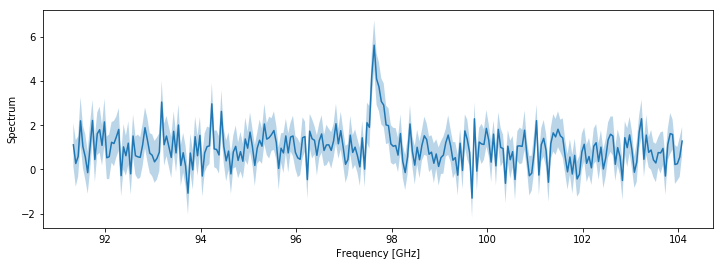

In [19]:
# plot the spectrum with your newfound uncertainties
uncertainties = np.sqrt(variances)

plt.figure(figsize=(12, 4))
spectrum = noisy_cube[:, 16, 16]
plt.plot(frequencies, spectrum)
plt.fill_between(frequencies, y1=spectrum - uncertainties, y2=spectrum + uncertainties, alpha=0.3)

plt.xlabel('Frequency [GHz]')
plt.ylabel('Spectrum');